In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Used_Bikes.csv')
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df.duplicated().sum()

np.int64(25324)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [9]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,401,35000.0,6,17654.0,0,3.0,110.0,19
1,295,119900.0,118,11000.0,0,4.0,350.0,17
2,411,600000.0,118,110.0,0,8.0,675.0,20
3,375,65000.0,44,16329.0,0,4.0,180.0,19
4,426,80000.0,44,10000.0,0,3.0,150.0,21
...,...,...,...,...,...,...,...,...
9362,141,25000.0,118,48587.0,0,8.0,150.0,5
9369,9,35000.0,44,60000.0,0,9.0,220.0,1
9370,110,450000.0,211,3430.0,0,4.0,750.0,4
9371,44,139000.0,185,21300.0,0,4.0,400.0,1


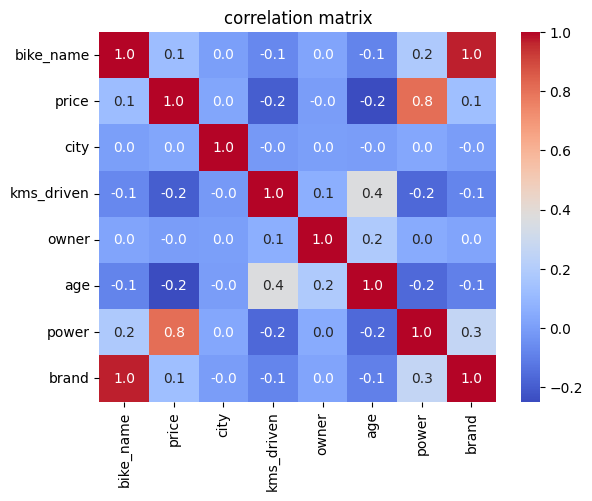

In [10]:
corr_matrix=df.corr()

sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

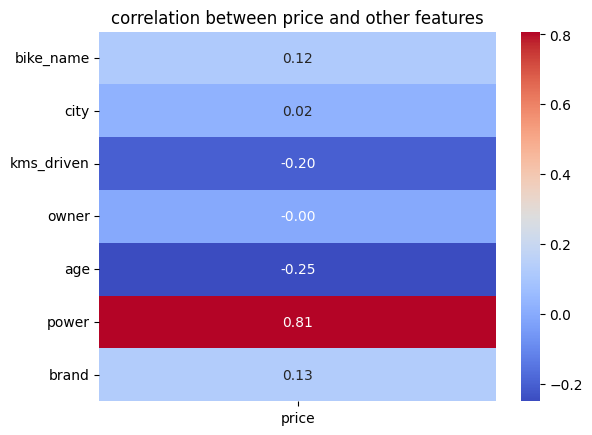

In [11]:
price_corr=df.corr()['price']

price_corr=price_corr.drop('price')

sns.heatmap(price_corr.to_frame(),annot=True,fmt='0.2f',cmap='coolwarm',annot_kws={'size':10})
plt.title('correlation between price and other features')
plt.show()

In [12]:
df.drop(['owner','city'],axis=1,inplace=True)

<Axes: >

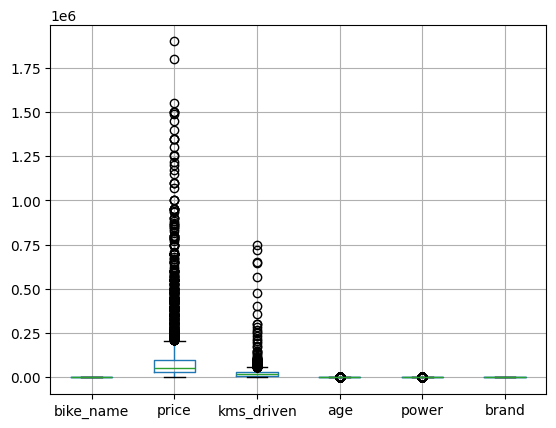

In [13]:
df.boxplot()

In [14]:
def remove_outlier(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
  return df

df_cleaned=remove_outlier(df,exclude_column='price')
df=df_cleaned

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

features=['bike_name','kms_driven','age','power','brand']

scaled=scaler.fit_transform(df[features])
scaled_df=pd.DataFrame(scaled,columns=features)

In [16]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

x=df.drop('price',axis=1)
y=df['price']

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

best_accuracy=0
best_fold= -1

best_x_train = None
best_y_train = None
best_x_test = None
best_y_test = None

for fold,(train_index,test_index) in enumerate(kf.split(x),1):
  x_train,x_test = x.iloc[train_index],x.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]

  model.fit(x_train,y_train)
  acc= model.score(x_test,y_test)
  print(f'Fold {fold} accuracy:{acc}')

  if acc > best_accuracy:
        best_accuracy = acc
        best_fold = fold
        best_x_train = x_train
        best_y_train = y_train
        best_x_test = x_test
        best_y_test = y_test

print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 accuracy:0.6705318759187041
Fold 2 accuracy:0.6997569274438766
Fold 3 accuracy:0.5389200230626632
Fold 4 accuracy:0.6775927459247901
Fold 5 accuracy:0.6947350859491106

 Best Fold: 2 with Accuracy: 0.6997569274438766


In [17]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.6997569274438766

In [18]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.8877365152394745

In [19]:
from sklearn.svm import SVR

model=SVR()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

-0.08405814249498422

In [20]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.9379514397521308